In [207]:

# Import data and modules
import pandas as pd
import numpy as np
from sklearn import datasets


iris = datasets.load_iris()

# We'll use the petal length and width only for this analysis
X = iris.data[:, [2, 3]]
y = iris.target

# Place the iris data into a pandas dataframe
iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=iris.feature_names[2:])

iris_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# Split Data

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 105 samples in the training set and 45 samples in the test set



# Standar Scaler

In [209]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246


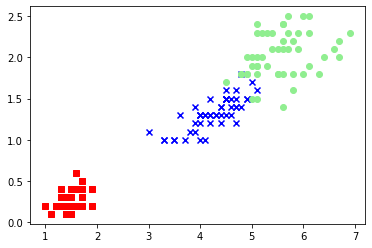

In [210]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)

# SVC

In [211]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

print('Score Train Data: ',(svm.score(X_train_std, y_train)))

print('Score Test Data: ',(svm.score(X_test_std, y_test)))

Score Train Data:  0.9523809523809523
Score Test Data:  0.9777777777777777


In [212]:
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

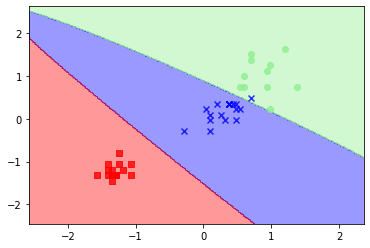

In [213]:
plot_decision_regions(X_test_std, y_test, svm)

# Xgboost


In [214]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train_std, y_train)

print('Score Train Data: ',(xgb_clf.score(X_train_std, y_train)))
print('Score Test Data: ',(xgb_clf.score(X_test_std, y_test)))

Score Train Data:  0.9904761904761905
Score Test Data:  0.9777777777777777


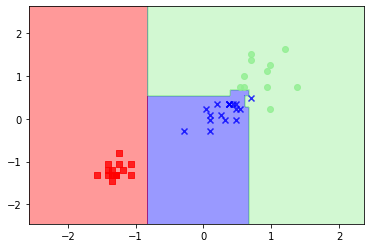

In [215]:
plot_decision_regions(X_test_std, y_test, xgb_clf)